In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../1d_fpr/1d_fpr_results.csv')
# drop the first column
df = df.drop(df.columns[0], axis=1)
df.head()

,true_beta_1,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,ols_pr,ols_diag_pr,robust_m_pr,robust_mm_pr,robust_s_pr
0,0.0,0.4,0.0,-1.0,4,0.05,0.100,0.050,0.055,0.06
1,0.0,0.4,0.0,-0.5,4,0.05,0.090,0.055,0.045,0.07
2,0.0,0.4,0.0,0.0,4,0.03,0.075,0.035,0.035,0.05
3,0.0,0.4,0.0,0.5,4,0.08,0.095,0.075,0.085,0.08
4,0.0,0.4,0.0,1.0,4,0.07,0.125,0.065,0.065,0.08


In [6]:
df.columns

Index(['true_beta_1', 'contamination_level', 'ctam_sigma', 'ctam_mu',
       'cook_cutoff', 'ols_pr', 'ols_diag_pr', 'robust_m_pr', 'robust_mm_pr',
       'robust_s_pr'],
      dtype='object')

In [7]:
feature_columns = ['true_beta_1', 'contamination_level', 'ctam_sigma', 'ctam_mu', 'cook_cutoff']
pr_columns = ['ols_pr', 'ols_diag_pr', 'robust_m_pr', 'robust_mm_pr','robust_s_pr']

# melt the dataframe
df_pr = df.melt(id_vars=feature_columns, value_vars=pr_columns, var_name='method', value_name='pr')
df_pr['method'] = df_pr['method'].str.replace('_mspe', '')
df_pr.head()


,true_beta_1,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,method,pr
0,0.0,0.4,0.0,-1.0,4,ols_pr,0.05
1,0.0,0.4,0.0,-0.5,4,ols_pr,0.05
2,0.0,0.4,0.0,0.0,4,ols_pr,0.03
3,0.0,0.4,0.0,0.5,4,ols_pr,0.08
4,0.0,0.4,0.0,1.0,4,ols_pr,0.07


In [8]:
df_pr.ctam_sigma.unique()

array([0. , 0.1, 0.2, 0.5, 1. , 2. ])

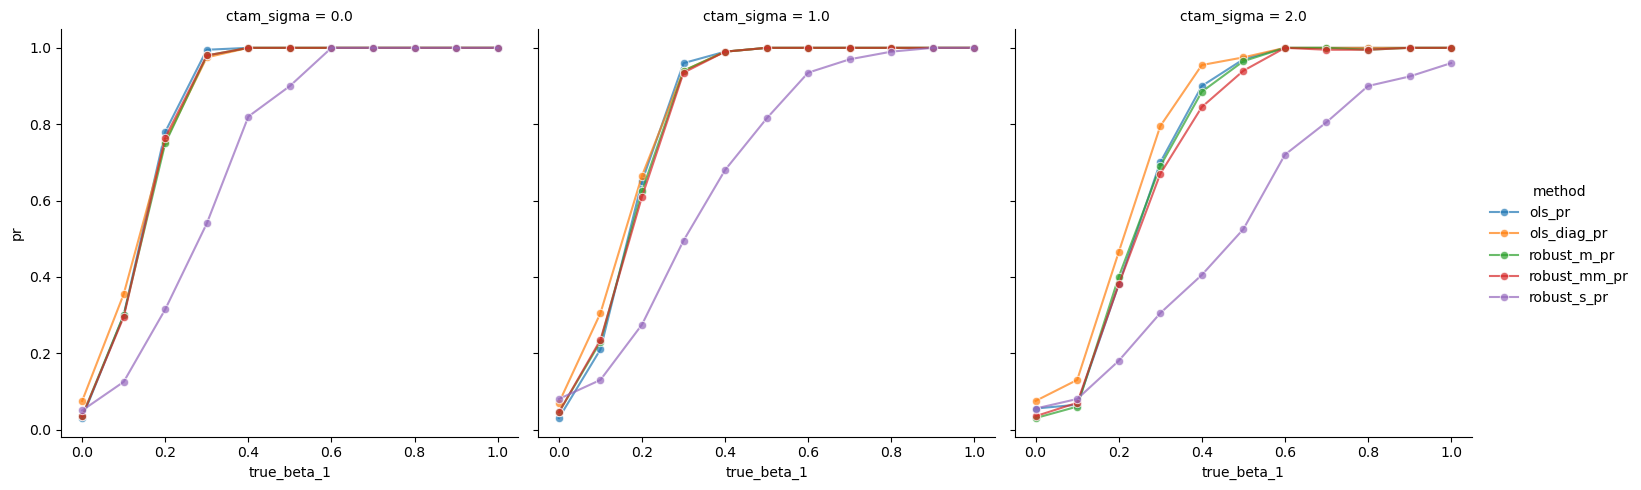

In [13]:
# filter by mu = 0, sigma = 0.2,0.5,1
df_pr_mu0_3sigma = df_pr[(df_pr['ctam_mu'] == 0) & (df_pr['ctam_sigma'].isin([0, 1, 2]))]

# facet by sigma plot for each method as hue
g = sns.FacetGrid(df_pr_mu0_3sigma, col='ctam_sigma', hue='method', col_wrap=3, height=5)
g.map(sns.lineplot, 'true_beta_1', 'pr', marker='o', alpha=0.7)
g.add_legend()
plt.show()
